In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("C:\\Users\\Prakhar\\Desktop\\customer_churn_large_dataset.xlsx")

In [3]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [4]:
df.shape

(100000, 9)

In [5]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df["Location"].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [8]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [10]:
df.drop("CustomerID",axis=1,inplace=True)

<Axes: xlabel='Gender', ylabel='count'>

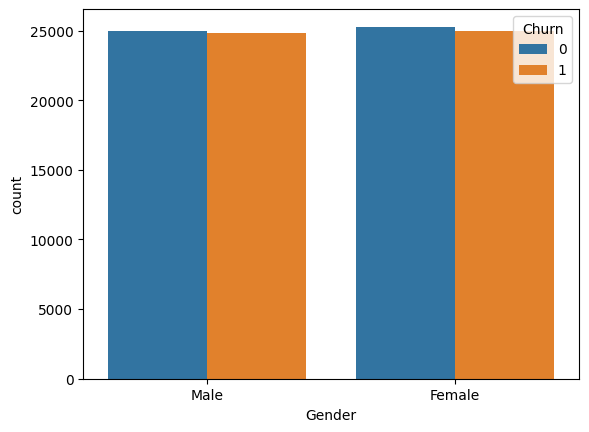

In [11]:
sns.countplot(data=df,x=df["Gender"],hue="Churn")

<Axes: xlabel='Location', ylabel='count'>

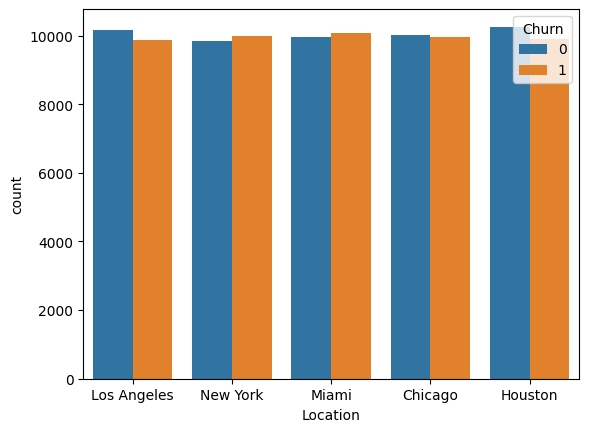

In [12]:
sns.countplot(data=df,x=df["Location"],hue="Churn")

In [13]:
dummies=pd.get_dummies(df.Gender)
df.drop("Gender",axis=1,inplace=True)
df=pd.concat([df,dummies],axis='columns')

In [14]:
df.head()

,Name,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Female,Male
0,Customer_1,63,Los Angeles,17,73.36,236,0,0,1
1,Customer_2,62,New York,1,48.76,172,0,1,0
2,Customer_3,24,Los Angeles,5,85.47,460,0,1,0
3,Customer_4,36,Miami,3,97.94,297,1,1,0
4,Customer_5,46,Miami,19,58.14,266,0,1,0


In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
location=ohe.fit_transform(df["Location"].values.reshape(-1, 1)) .toarray()

In [16]:
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
print(feature_labels) 
one_hot_featurelabels=pd.DataFrame(location,columns=feature_labels)

['Chicago' 'Houston' 'Los Angeles' 'Miami' 'New York']


In [17]:
df=pd.concat([df,one_hot_featurelabels],axis='columns')

In [18]:
df.drop(columns=["Name","Location"],inplace=True)
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,0,1,0.0,0.0,1.0,0.0,0.0
1,62,1,48.76,172,0,1,0,0.0,0.0,0.0,0.0,1.0
2,24,5,85.47,460,0,1,0,0.0,0.0,1.0,0.0,0.0
3,36,3,97.94,297,1,1,0,0.0,0.0,0.0,1.0,0.0
4,46,19,58.14,266,0,1,0,0.0,0.0,0.0,1.0,0.0


In [247]:
df.to_csv("new.csv")

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_13164\2382639120.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(df.Monthly_Bill[(df["Churn"]==0)],
C:\Users\Prakhar\AppData\Local\Temp\ipykernel_13164\2382639120.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(df.Monthly_Bill[(df["Churn"]==1)],


Text(0.5, 1.0, 'monthly charges by churn')

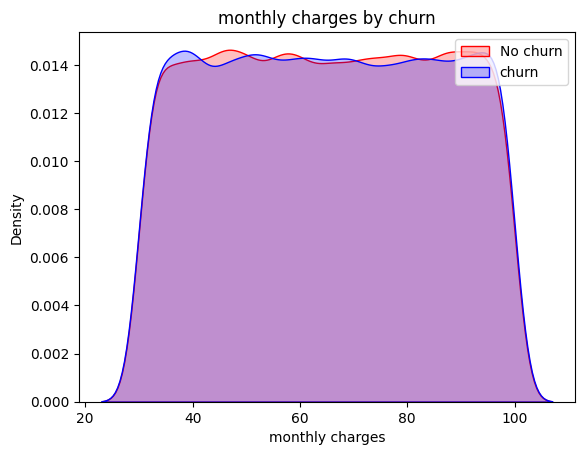

In [19]:
mth=sns.kdeplot(df.Monthly_Bill[(df["Churn"]==0)],
                color="Red",shade=True)
mth=sns.kdeplot(df.Monthly_Bill[(df["Churn"]==1)],
               ax=mth,color="Blue",shade=True)

mth.legend(["No churn","churn"],loc='upper right')
mth.set_ylabel("Density")
mth.set_xlabel("monthly charges")
mth.set_title("monthly charges by churn")

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_13164\3616690983.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(df.Subscription_Length_Months[(df["Churn"]==0)],
C:\Users\Prakhar\AppData\Local\Temp\ipykernel_13164\3616690983.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(df.Subscription_Length_Months[(df["Churn"]==1)],


Text(0.5, 1.0, 'subsc. length by churn')

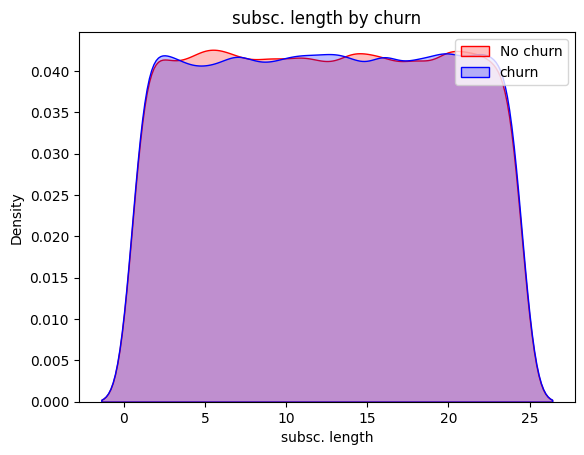

In [20]:
mth=sns.kdeplot(df.Subscription_Length_Months[(df["Churn"]==0)],
                color="Red",shade=True)
mth=sns.kdeplot(df.Subscription_Length_Months[(df["Churn"]==1)],
               ax=mth,color="Blue",shade=True)

mth.legend(["No churn","churn"],loc='upper right')
mth.set_ylabel("Density")
mth.set_xlabel("subsc. length")
mth.set_title("subsc. length by churn")

<Axes: >

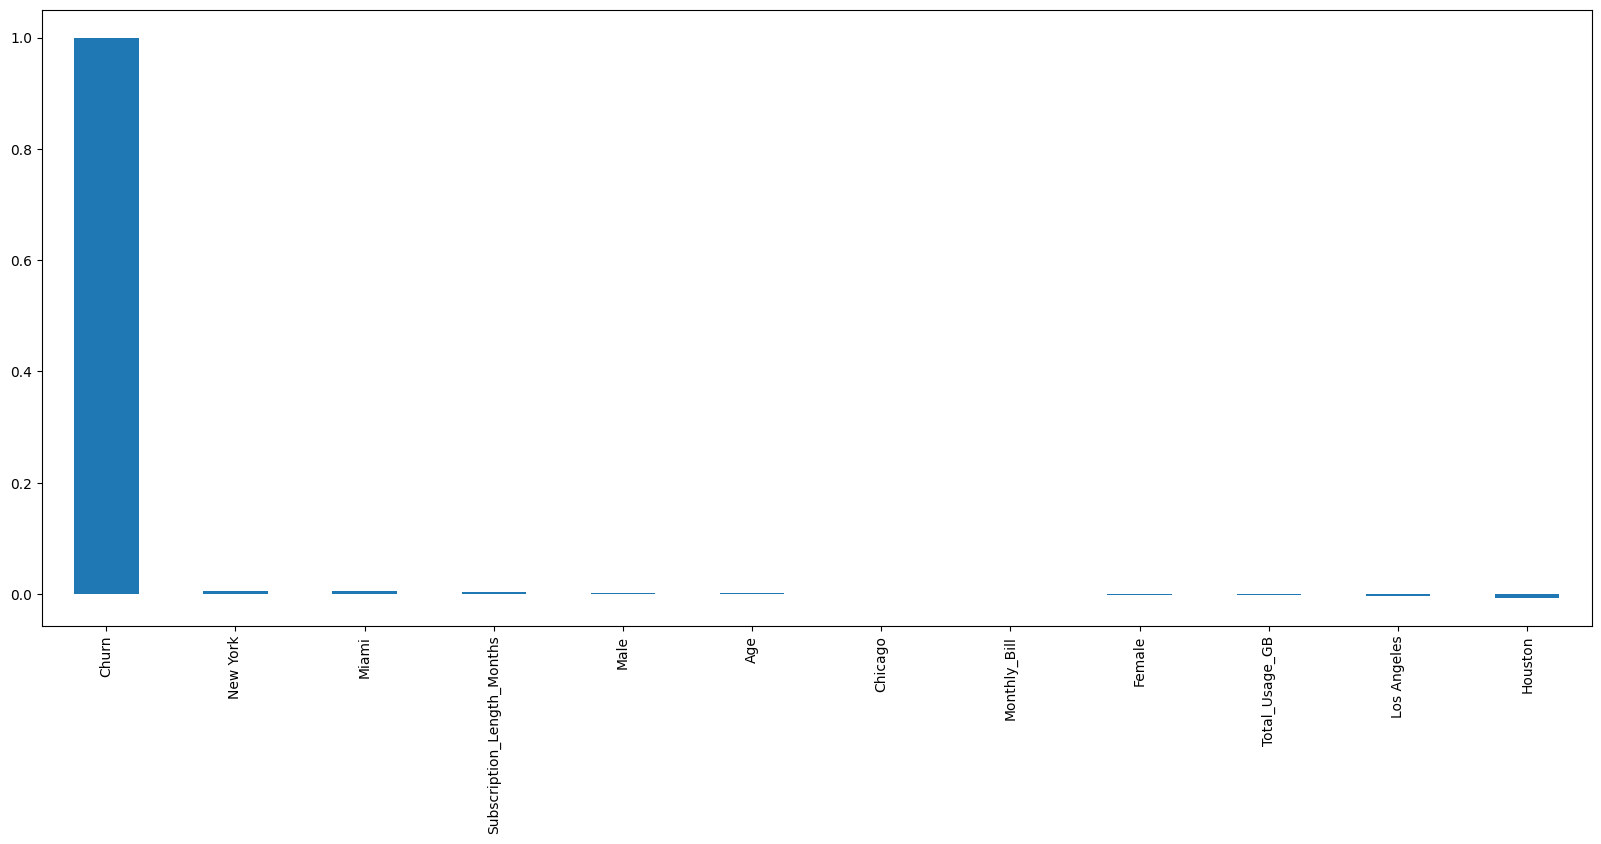

In [21]:
plt.figure(figsize=(20,8))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r')

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
Age,1.000000,0.003382,0.001110,0.001927,0.001559,-0.000832,0.000832,0.006068,0.001795,-0.004971,0.001079,-0.003982
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328,-0.000320,0.000320,0.002187,-0.001842,-0.001234,0.005508,-0.004630
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211,-0.002239,0.002239,-0.005772,0.001856,0.003444,-0.002521,0.002992
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842,0.001385,-0.001385,-0.000442,-0.002137,-0.001562,0.001320,0.002837
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000,-0.002121,0.002121,0.000506,-0.006728,-0.004807,0.005235,0.005835
Female,-0.000832,-0.000320,-0.002239,0.001385,-0.002121,1.000000,-1.000000,0.000695,-0.006234,0.001360,0.001561,0.002645
Male,0.000832,0.000320,0.002239,-0.001385,0.002121,-1.000000,1.000000,-0.000695,0.006234,-0.001360,-0.001561,-0.002645
Chicago,0.006068,0.002187,-0.005772,-0.000442,0.000506,0.000695,-0.000695,1.000000,-0.250896,-0.249992,-0.249914,-0.248212
Houston,0.001795,-0.001842,0.001856,-0.002137,-0.006728,-0.006234,0.006234,-0.250896,1.000000,-0.251548,-0.251469,-0.249757
Los Angeles,-0.004971,-0.001234,0.003444,-0.001562,-0.004807,0.001360,-0.001360,-0.249992,-0.251548,1.000000,-0.250563,-0.248857


<Axes: >

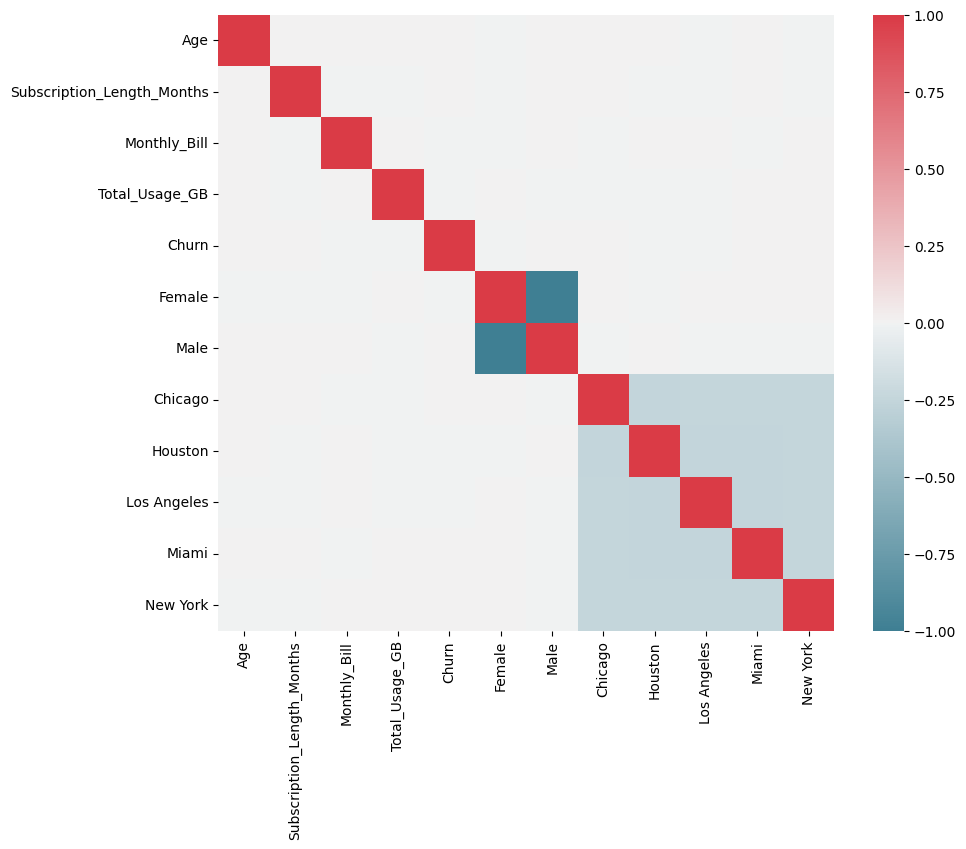

In [23]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [29]:
import pandas as pd 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [48]:
from sklearn.metrics import f1_score


In [226]:
x=df.drop("Churn",axis=1)
x.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,1,0.0,0.0,1.0,0.0,0.0
1,62,1,48.76,172,1,0,0.0,0.0,0.0,0.0,1.0
2,24,5,85.47,460,1,0,0.0,0.0,1.0,0.0,0.0
3,36,3,97.94,297,1,0,0.0,0.0,0.0,1.0,0.0
4,46,19,58.14,266,1,0,0.0,0.0,0.0,1.0,0.0


In [227]:
y=df["Churn"]

In [60]:
from sklearn.preprocessing import StandardScaler

In [204]:
my_list=list(x)
my_list

['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Female',
 'Male',
 'Chicago',
 'Houston',
 'Los Angeles',
 'Miami',
 'New York']

In [205]:
scaler = StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=my_list)
x_scaled.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
0,1.241670,0.651115,0.410606,-0.294289,-1.004329,1.004329,-0.499344,-0.502452,1.997441,-0.500484,-0.497076
1,1.176226,-1.658879,-0.805374,-0.784852,0.995689,-0.995689,-0.499344,-0.502452,-0.500641,-0.500484,2.011763
2,-1.310651,-1.081380,1.009204,1.422681,0.995689,-0.995689,-0.499344,-0.502452,1.997441,-0.500484,-0.497076
3,-0.525321,-1.370129,1.625597,0.173279,0.995689,-0.995689,-0.499344,-0.502452,-0.500641,1.998065,-0.497076
4,0.129120,0.939864,-0.341720,-0.064338,0.995689,-0.995689,-0.499344,-0.502452,-0.500641,1.998065,-0.497076


In [228]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)


In [84]:
clf = RandomForestClassifier(random_state=42,criterion="entropy")

In [85]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [86]:
y_pred=clf.predict(x_test)

In [87]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50     10008
           1       0.49      0.47      0.48      9992

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



In [88]:
#from sklearn.linear_model import LogisticRegression
clf_1 = LogisticRegression(random_state=42)

In [89]:
clf_1.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [90]:
y_pred_1=clf_1.predict(x_test)

In [91]:
print(classification_report(y_test,y_pred_1,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56     10008
           1       0.51      0.39      0.44      9992

    accuracy                           0.51     20000
   macro avg       0.51      0.50      0.50     20000
weighted avg       0.51      0.51      0.50     20000



In [92]:
#from sklearn import svm
clf_2=svm.SVC()
clf_2.fit(x_train,y_train)

SVC()

In [93]:
y_pred_2=clf_2.predict(x_test)

In [94]:
print(classification_report(y_test,y_pred_2,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55     10008
           1       0.50      0.41      0.45      9992

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [95]:
#from sklearn.naive_bayes import GaussianNB
clf_3=GaussianNB()

In [96]:
clf_3.fit(x_train,y_train)
y_pred_3=clf_3.predict(x_test)

In [97]:
print(classification_report(y_test,y_pred_3,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54     10008
           1       0.50      0.42      0.46      9992

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [215]:
type(x_train.values)

numpy.ndarray

In [224]:
import torch
from torch import nn



In [229]:
x_train=torch.from_numpy(x_train.values).type(torch.float).to("cuda")
y_train=torch.from_numpy(y_train.values).type(torch.LongTensor).to("cuda")

In [230]:
y_train.type()

'torch.cuda.LongTensor'

In [239]:
class clfmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model= nn.Sequential(
            nn.Linear(in_features=11,out_features=11),
            nn.ReLU(),
            nn.Linear(in_features=11,out_features=11),
            nn.ReLU(),
            nn.Linear(in_features=11,out_features=11),
            nn.ReLU(),
            nn.Linear(in_features=11,out_features=2),
            
            
        )


    def forward(self,x):
        return self.model(x)

model_4=clfmodel().to(device)

In [232]:
x_train.shape,y_train.shape

(torch.Size([80000, 11]), torch.Size([80000]))

In [233]:
torch.unique(y_train)

tensor([0, 1], device='cuda:0')

In [240]:
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

In [241]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [237]:
x_test=torch.from_numpy(x_test.values).type(torch.float).to("cuda")
y_test=torch.from_numpy(y_test.values).type(torch.LongTensor).to("cuda")

In [238]:
x_test.device,x_train.device,y_train.device,y_test.device,x_test.type(),x_train.type(),y_train.type(), y_test.type()

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 'torch.cuda.FloatTensor',
 'torch.cuda.FloatTensor',
 'torch.cuda.LongTensor',
 'torch.cuda.LongTensor')

In [242]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [246]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000


x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)





for epoch in range(epochs):
    model_4.train()
    y_logits=model_4(x_train)
    y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model_4.eval()
    with torch.inference_mode():
        test_logits=model_4(x_test)

        test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,
                             y_pred=test_preds)


        if epoch%10==0:
            print(f"epoch :{epoch} | loss:{loss:.4f} , acc :{acc:.2f} | testloss :{test_loss:.4f} | test_acc: {test_acc:.4f}")


epoch :0 | loss:0.6931 , acc :50.36 | testloss :0.6931 | test_acc: 49.9600
epoch :10 | loss:0.6931 , acc :50.34 | testloss :0.6931 | test_acc: 50.0150
epoch :20 | loss:0.6931 , acc :50.34 | testloss :0.6931 | test_acc: 50.0250
epoch :30 | loss:0.6931 , acc :50.34 | testloss :0.6931 | test_acc: 50.0500
epoch :40 | loss:0.6931 , acc :50.33 | testloss :0.6931 | test_acc: 50.0350
epoch :50 | loss:0.6931 , acc :50.33 | testloss :0.6931 | test_acc: 50.0800
epoch :60 | loss:0.6931 , acc :50.33 | testloss :0.6931 | test_acc: 50.0850
epoch :70 | loss:0.6931 , acc :50.35 | testloss :0.6931 | test_acc: 50.1250
epoch :80 | loss:0.6931 , acc :50.35 | testloss :0.6931 | test_acc: 50.1550
epoch :90 | loss:0.6931 , acc :50.34 | testloss :0.6931 | test_acc: 50.1500
epoch :100 | loss:0.6931 , acc :50.32 | testloss :0.6931 | test_acc: 50.1650
epoch :110 | loss:0.6931 , acc :50.31 | testloss :0.6931 | test_acc: 50.2100
epoch :120 | loss:0.6931 , acc :50.30 | testloss :0.6931 | test_acc: 50.2100
epoch :130